In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
data_dir = os.path.join(os.getcwd(), '../data')
raw_data_dir = os.path.join(data_dir, 'raw')
Food_Delivery_Data = os.path.join(raw_data_dir, 'Food_Delivery_Data.xlsx')


preprocessed_out_dir = os.path.join(data_dir, 'Preprocessed')
os.makedirs(preprocessed_out_dir, exist_ok=True)
preprocessed_saved_filepath = os.path.join(preprocessed_out_dir, 'preprocessed.pkl')

In [3]:
df = pd.read_pickle(preprocessed_saved_filepath)

---

## 3. Exploratory Data Analysis 

### Comprehensive Statistical Analysis
Deep dive into feature distributions, relationships, and patterns that will inform our modeling approach.


### EDA Analysis Plan

**Comprehensive analysis approach:**
- **Univariate Analysis**: Distribution shapes, skewness, and kurtosis of numeric features
- **Bivariate Analysis**: Relationships between features and target variable (delivery time)  
- **Multivariate Analysis**: Feature correlations and interaction patterns
- **Outlier Detection**: Identify anomalies that might affect model performance
- **Feature Derivation**: Create additional meaningful features from existing data

#### Univariate Analysis: Feature Distributions
Examining the shape and characteristics of our key numeric features to understand data patterns and identify potential transformation needs.


Creating distribution plots for key numeric features...


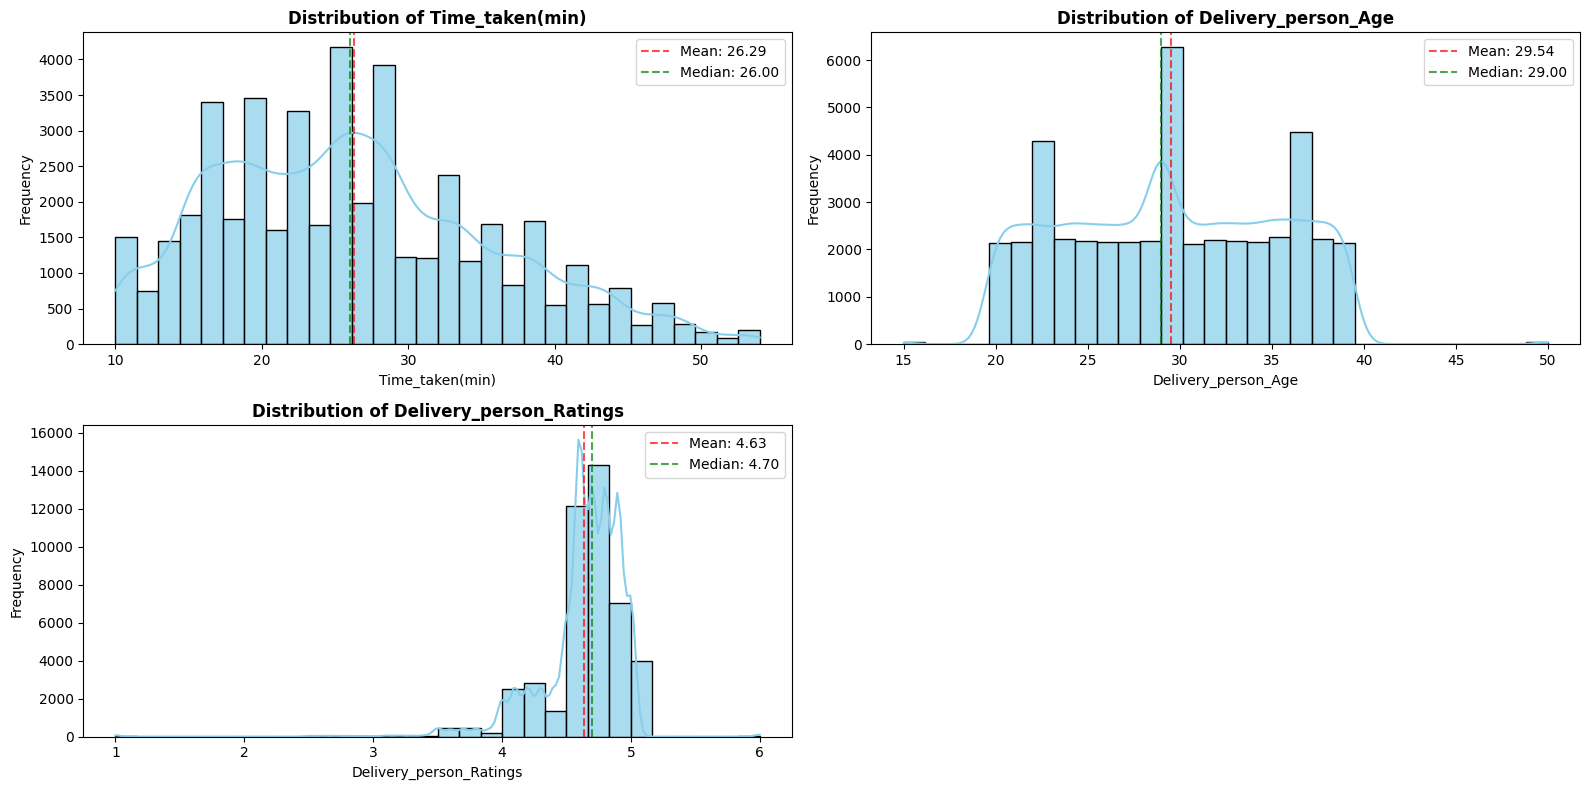

Distribution analysis completed!


In [4]:
# Univariate Analysis: Distribution visualization
print("Creating distribution plots for key numeric features...")

# Key numeric features for analysis
numeric_cols = ['Time_taken(min)', 'Delivery_person_Age', 'Delivery_person_Ratings']

plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    
    # Create histogram with KDE overlay
    sns.histplot(df[col], kde=True, bins=30, alpha=0.7, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Add statistical annotations
    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()
print("Distribution analysis completed!")

#### Statistical Shape Analysis: Skewness & Kurtosis
Measuring distribution characteristics to identify features that may benefit from transformation:

In [5]:
# Statistical shape analysis for numeric features
from scipy.stats import kurtosis, skew

print(" Statistical Shape Analysis")
print("=" * 50)

# Calculate kurtosis (measure of tail heaviness)
kurtosis_results = {}
for col in numeric_cols:
    kurtosis_results[col] = kurtosis(df[col].dropna())

print(" Kurtosis Analysis (Normal ≈ 0):")
for col, val in kurtosis_results.items():
    interpretation = "Heavy tails" if val > 1 else "Light tails" if val < -1 else "Near normal"
    print(f"   • {col}: {val:.3f} ({interpretation})")

print("\n" + "-" * 50)

# Calculate skewness (measure of asymmetry) 
skewness_results = {}
for col in numeric_cols:
    skewness_results[col] = skew(df[col].dropna())

print(" Skewness Analysis (Normal ≈ 0):")
for col, val in skewness_results.items():
    if abs(val) > 1:
        interpretation = "Highly skewed"
        recommendation = " Consider log transformation"
    elif abs(val) > 0.5:
        interpretation = "Moderately skewed" 
        recommendation = " Monitor for model impact"
    else:
        interpretation = "Approximately normal"
        recommendation = " Good distribution"
    
    direction = "right" if val > 0 else "left" if val < 0 else "symmetric"
    print(f"   • {col}: {val:.3f} ({interpretation}, {direction}) - {recommendation}")

 Statistical Shape Analysis
 Kurtosis Analysis (Normal ≈ 0):
   • Time_taken(min): -0.311 (Near normal)
   • Delivery_person_Age: -0.977 (Near normal)
   • Delivery_person_Ratings: 16.424 (Heavy tails)

--------------------------------------------------
 Skewness Analysis (Normal ≈ 0):
   • Time_taken(min): 0.486 (Approximately normal, right) -  Good distribution
   • Delivery_person_Age: 0.031 (Approximately normal, right) -  Good distribution
   • Delivery_person_Ratings: -2.533 (Highly skewed, left) -  Consider log transformation


#### Bivariate Analysis: Feature-Target Relationships  
Exploring how each feature correlates with delivery time to identify the most predictive variables.

 Analyzing relationships between features and delivery time...


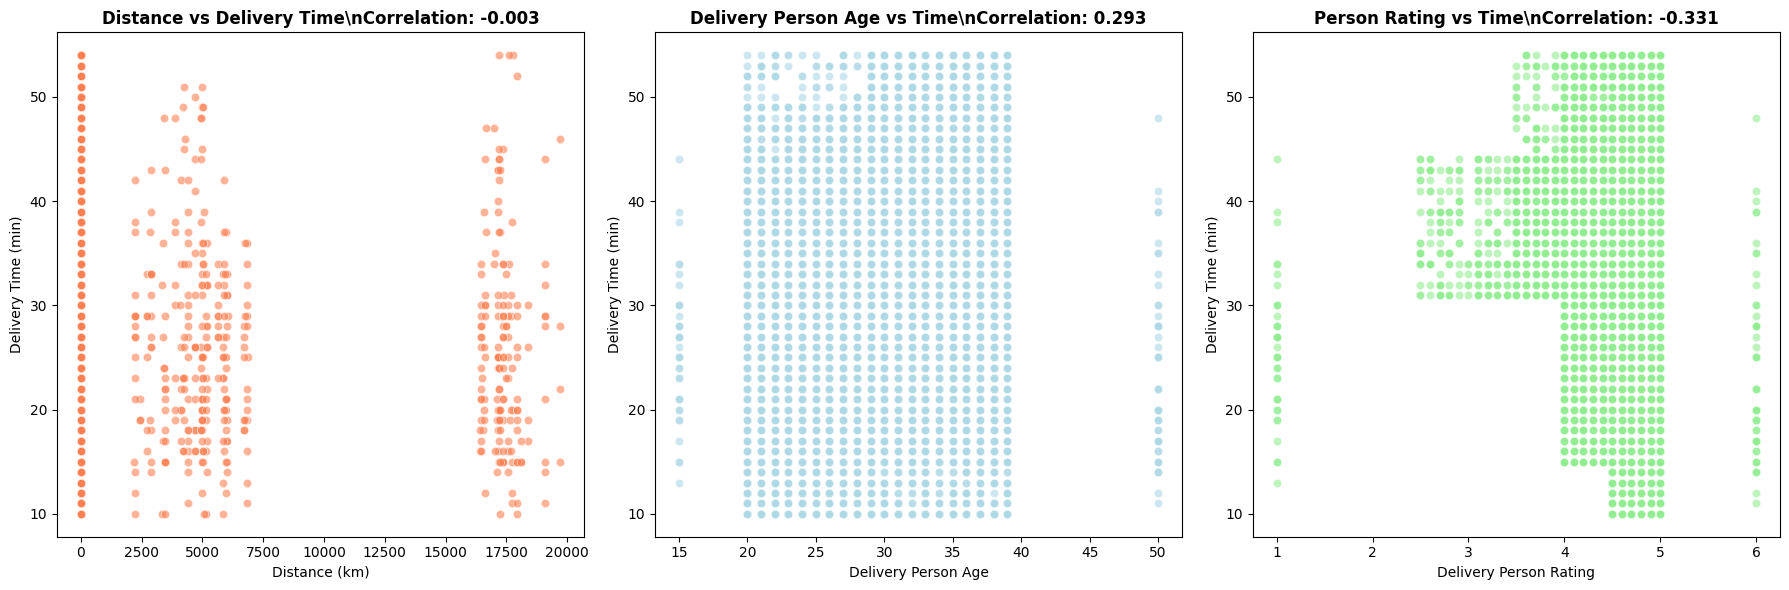


 Correlation Summary:
   • Distance → Time: -0.003 (Weak)
   • Age → Time: 0.293 (Weak)
   • Rating → Time: -0.331 (Moderate)


In [6]:
# Bivariate Analysis: Feature relationships with target variable
print(" Analyzing relationships between features and delivery time...")

plt.figure(figsize=(18, 6))

# 1. Distance vs Time relationship
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='distance_geodesic_km', y='Time_taken(min)', alpha=0.6, color='coral')
correlation_dist = df['distance_geodesic_km'].corr(df['Time_taken(min)'])
plt.title(f'Distance vs Delivery Time\\nCorrelation: {correlation_dist:.3f}', fontweight='bold')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (min)')

# 2. Age vs Time relationship  
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Delivery_person_Age', y='Time_taken(min)', alpha=0.6, color='lightblue')
correlation_age = df['Delivery_person_Age'].corr(df['Time_taken(min)'])
plt.title(f'Delivery Person Age vs Time\\nCorrelation: {correlation_age:.3f}', fontweight='bold')
plt.xlabel('Delivery Person Age')
plt.ylabel('Delivery Time (min)')

# 3. Rating vs Time relationship
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Delivery_person_Ratings', y='Time_taken(min)', alpha=0.6, color='lightgreen')
correlation_rating = df['Delivery_person_Ratings'].corr(df['Time_taken(min)'])
plt.title(f'Person Rating vs Time\\nCorrelation: {correlation_rating:.3f}', fontweight='bold') 
plt.xlabel('Delivery Person Rating')
plt.ylabel('Delivery Time (min)')

plt.tight_layout()
plt.show()

print("\n Correlation Summary:")
print(f"   • Distance → Time: {correlation_dist:.3f} ({'Strong' if abs(correlation_dist) > 0.5 else 'Moderate' if abs(correlation_dist) > 0.3 else 'Weak'})")
print(f"   • Age → Time: {correlation_age:.3f} ({'Strong' if abs(correlation_age) > 0.5 else 'Moderate' if abs(correlation_age) > 0.3 else 'Weak'})")
print(f"   • Rating → Time: {correlation_rating:.3f} ({'Strong' if abs(correlation_rating) > 0.5 else 'Moderate' if abs(correlation_rating) > 0.3 else 'Weak'})")

#### Binned Analysis: Categorical Impact Assessment
Analyzing how different value ranges of continuous features affect delivery time by creating bins and examining mean delivery times within each bin.

Creating binned analysis to understand feature impact patterns...
Analyzing distance impact...
Analyzing delivery person age impact...
Analyzing delivery person rating impact...


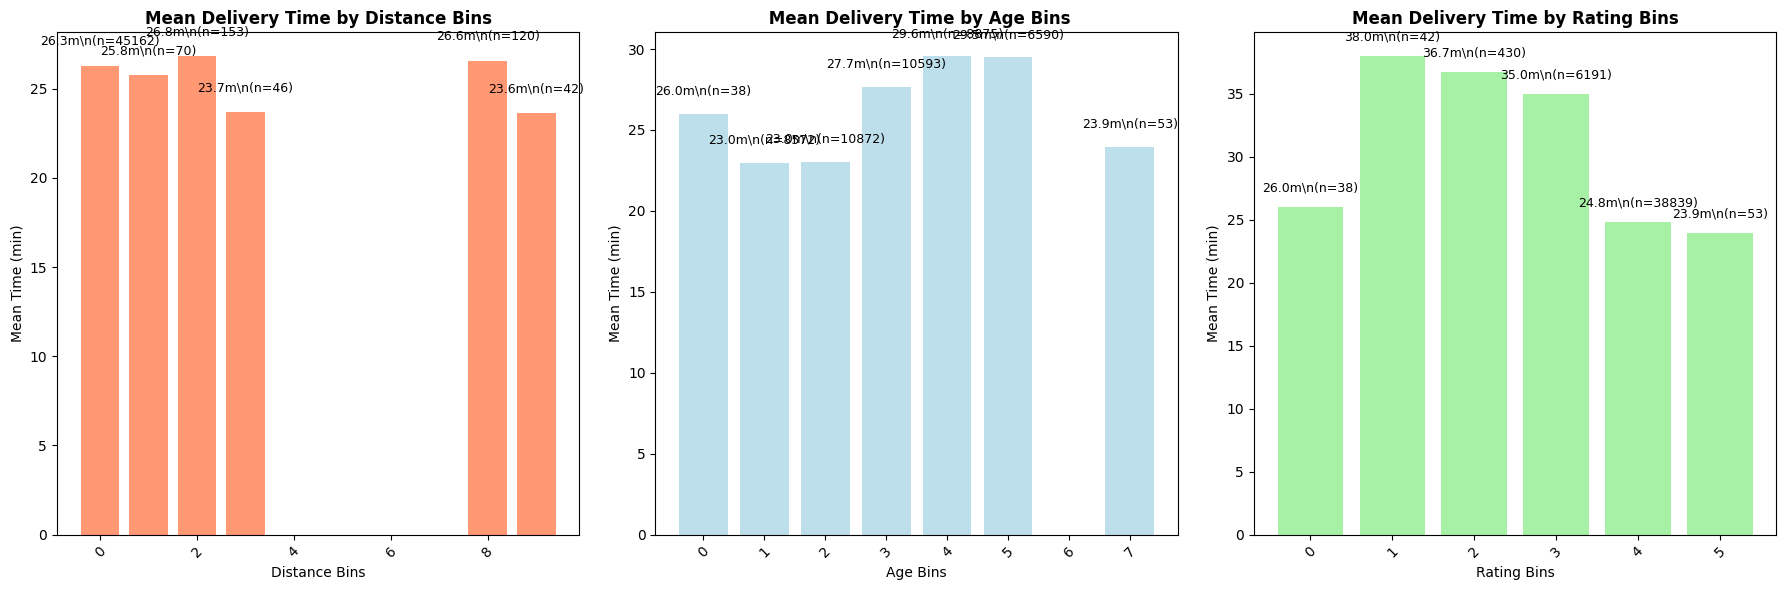


 Binned Analysis Insights:
 Distance Analysis:
     distance_bins      mean  count
   (-18.2, 1972.3] 26.298038  45162
  (1972.3, 3943.1] 25.771429     70
  (3943.1, 5913.9] 26.823529    153
  (5913.9, 7884.7] 23.673913     46
  (7884.7, 9855.5]       NaN      0
 (9855.5, 11826.3]       NaN      0
(11826.3, 13797.1]       NaN      0
(13797.1, 15768.0]       NaN      0
(15768.0, 17738.8] 26.575000    120
(17738.8, 19709.6] 23.619048     42
\n Age Analysis:
    age_bins      mean  count
(15.0, 19.0] 26.000000     38
(19.0, 24.0] 22.983084   8572
(24.0, 28.0] 23.009566  10872
(28.0, 32.0] 27.650241  10593
(32.0, 37.0] 29.552676   8875
(37.0, 41.0] 29.475417   6590
(41.0, 46.0]       NaN      0
(46.0, 50.0] 23.943396     53
\nRating Analysis:
rating_bins      mean  count
 (1.0, 1.8] 26.000000     38
 (1.8, 2.7] 37.976190     42
 (2.7, 3.5] 36.739535    430
 (3.5, 4.3] 34.974641   6191
 (4.3, 5.2] 24.786220  38839
 (5.2, 6.0] 23.943396     53


In [7]:
# Binned Analysis: Understanding feature impact on delivery time
print("Creating binned analysis to understand feature impact patterns...")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Distance Impact Analysis
print("Analyzing distance impact...")
df['distance_bins'] = pd.cut(df['distance_geodesic_km'], bins=10, precision=1)
dist_grouped = df.groupby('distance_bins')['Time_taken(min)'].agg(['mean', 'count']).reset_index()

axes[0].bar(range(len(dist_grouped)), dist_grouped['mean'], alpha=0.8, color='coral')
axes[0].set_title('Mean Delivery Time by Distance Bins', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Distance Bins')
axes[0].set_ylabel('Mean Time (min)')
axes[0].tick_params(axis='x', rotation=45)

# Add data labels on bars
for i, (mean_time, count) in enumerate(zip(dist_grouped['mean'], dist_grouped['count'])):
    axes[0].text(i, mean_time + 1, f'{mean_time:.1f}m\\n(n={count})', 
                ha='center', va='bottom', fontsize=9)

# 2. Age Impact Analysis  
print("Analyzing delivery person age impact...")
df['age_bins'] = pd.cut(df['Delivery_person_Age'], bins=8, precision=0)
age_grouped = df.groupby('age_bins')['Time_taken(min)'].agg(['mean', 'count']).reset_index()

axes[1].bar(range(len(age_grouped)), age_grouped['mean'], alpha=0.8, color='lightblue')
axes[1].set_title(' Mean Delivery Time by Age Bins', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Age Bins')
axes[1].set_ylabel('Mean Time (min)')
axes[1].tick_params(axis='x', rotation=45)

# Add data labels
for i, (mean_time, count) in enumerate(zip(age_grouped['mean'], age_grouped['count'])):
    axes[1].text(i, mean_time + 1, f'{mean_time:.1f}m\\n(n={count})', 
                ha='center', va='bottom', fontsize=9)

# 3. Rating Impact Analysis
print("Analyzing delivery person rating impact...")
df['rating_bins'] = pd.cut(df['Delivery_person_Ratings'], bins=6, precision=1)
rating_grouped = df.groupby('rating_bins')['Time_taken(min)'].agg(['mean', 'count']).reset_index()

axes[2].bar(range(len(rating_grouped)), rating_grouped['mean'], alpha=0.8, color='lightgreen')
axes[2].set_title('Mean Delivery Time by Rating Bins', fontweight='bold', fontsize=12)
axes[2].set_xlabel('Rating Bins')
axes[2].set_ylabel('Mean Time (min)')
axes[2].tick_params(axis='x', rotation=45)

# Add data labels
for i, (mean_time, count) in enumerate(zip(rating_grouped['mean'], rating_grouped['count'])):
    axes[2].text(i, mean_time + 1, f'{mean_time:.1f}m\\n(n={count})', 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\n Binned Analysis Insights:")
print("=" * 50)
print(" Distance Analysis:")
print(dist_grouped[['distance_bins', 'mean', 'count']].to_string(index=False))
print("\\n Age Analysis:")
print(age_grouped[['age_bins', 'mean', 'count']].to_string(index=False))
print("\\nRating Analysis:")
print(rating_grouped[['rating_bins', 'mean', 'count']].to_string(index=False))

#### Multivariate Analysis: Correlation Matrix
Examining relationships between all numeric features to identify potential multicollinearity and feature interactions.

 Creating correlation matrix for multivariate analysis...


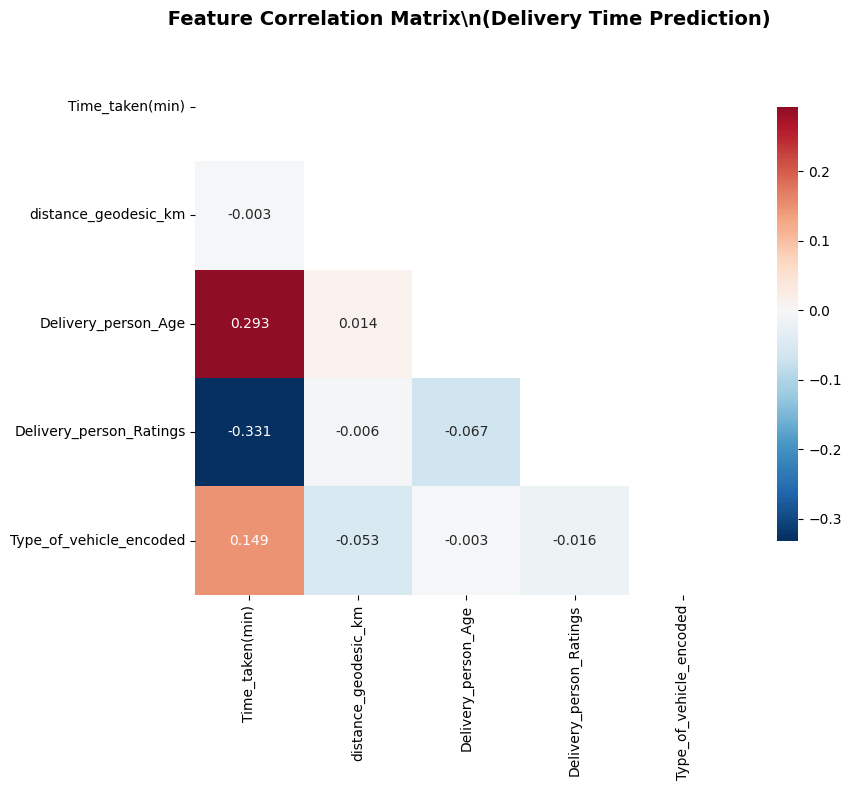


 Correlation Analysis Summary:
• Time_taken(min) ↔ Delivery_person_Ratings: -0.331 (Moderate Negative)

 Target Variable Correlations:
• Delivery_person_Ratings: -0.331
• Delivery_person_Age: 0.293
• Type_of_vehicle_encoded: 0.149
• distance_geodesic_km: -0.003


In [8]:
# Multivariate Analysis: Comprehensive correlation heatmap
print(" Creating correlation matrix for multivariate analysis...")

# Select key numeric features for correlation analysis
correlation_features = [
    'Time_taken(min)', 'distance_geodesic_km', 'Delivery_person_Age', 
    'Delivery_person_Ratings', 'Type_of_vehicle_encoded'
]

plt.figure(figsize=(10, 8))
corr_matrix = df[correlation_features].corr()

# Create enhanced heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, 
           annot=True,           # Show correlation values
           cmap='RdBu_r',        # Red-blue colormap (red=positive, blue=negative)
           center=0,             # Center colormap at 0
           square=True,          # Square cells
           fmt='.3f',            # 3 decimal places
           cbar_kws={"shrink": .8},
           mask=mask)            # Hide upper triangle

plt.title(' Feature Correlation Matrix\\n(Delivery Time Prediction)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Analyze strong correlations
print("\n Correlation Analysis Summary:")
print("=" * 40)
strong_correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:  # Threshold for significant correlation
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            strength = "Strong" if abs(corr_val) > 0.7 else "Moderate"
            direction = "Positive" if corr_val > 0 else "Negative"
            strong_correlations.append((feature1, feature2, corr_val, strength, direction))

if strong_correlations:
    for feat1, feat2, corr, strength, direction in strong_correlations:
        print(f"• {feat1} ↔ {feat2}: {corr:.3f} ({strength} {direction})")
else:
    print("• No strong correlations (>0.3) detected between features")
    
print(f"\n Target Variable Correlations:")
target_corrs = corr_matrix['Time_taken(min)'].drop('Time_taken(min)').sort_values(key=abs, ascending=False)
for feature, corr_val in target_corrs.items():
    print(f"• {feature}: {corr_val:.3f}")

### Summary on EDA: 
To understand the data's underlying structure, validate assumptions for regression modeling, and identify key drivers of delivery time, a comprehensive statistical analysis was conducted. 

**Inference from the Univariate Analysis**: We examined the distribution of individual predictors and the target variable to identify skewness and outliers.

- Distribution of time taken is not normally distributed suggesting this could indicate issues such as inaccurate time reporting, inefficient tracking, or the presence of operational outliers causing delivery delays
- The age distribution of delivery person is mostly uniform suggesting dataset includes delivery personnel from a wide range of ages with approximately equal representation, except for the observable spikes at specific ages.
- The distribution of delivery-person ratings is left‑skewed (negatively skewed), with most ratings concentrated between about 4.3 and 5.0. 
- The long left tail shows a small number of delivery personnel with notably lower ratings, who can potentially be identified and targeted for interventions or further analysis using modeling.

**Inference for Bivariate Analysis** : To evaluate the direct relationship between independent features and the target variable (Time_taken), scatter plots were utilized

- There is no clear trend of younger or older drivers being consistently faster or slower, suggesting age alone is not a strong predictor of delivery speed in this dataset
- A few very low or very high ratings exist, but their times overlap the main cluster, indicating that customer ratings capture broader service quality and experience rather than just speed, and rating by itself has limited direct impact on delivery time
- **Binned Analysis** : To capture non-linear trends and simplify noisy data, continuous features were segmented into discrete bins to analyze the Mean Delivery Time per group. Distance Bins visualized the incremental increase in delivery time across specific distance ranges. Age & Rating Bins aggregated drivers into age and rating groups to identify performance trends 

**Multivariate Analysis**
- To identify multicollinearity and assess feature redundancy, a Correlation Heatmap was generated.
The heatmap confirms there is no serious multicollinearity among the predictors; pairwise correlations between features are all close to zero, so they can safely be used together in models like Linear Regression
- Time_taken shows a weak positive correlation with Delivery_person_Age (≈0.29) and Type_of_vehicle_encoded (≈0.15), and a weak negative correlation with Delivery_person_Ratings (≈−0.33), meaning these attributes have some linear relationship with delivery time but not a very strong one.

